[1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


Text(0, 0.5, 'feature 1')

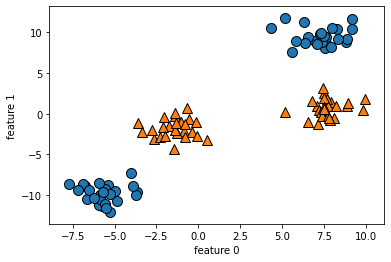

In [6]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(centers = 4, random_state=8)
y = y % 2
print(y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

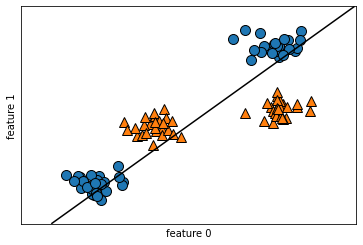

In [7]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

#help(mglearn.discrete_scatter)

[[-1.72161036e+00 -1.48033142e+00  2.19138111e+00]
 [-3.65733840e+00 -9.54823830e+00  9.11688546e+01]
 [ 7.07781630e+00  9.95087718e-01  9.90199567e-01]
 [-1.36579859e+00 -3.14862498e-01  9.91383928e-02]
 [-2.66521206e+00 -3.12591651e+00  9.77135405e+00]
 [ 7.63027116e+00  8.69797933e+00  7.56548444e+01]
 [-5.27144331e+00 -1.21188070e+01  1.46865483e+02]
 [ 7.91767139e+00  1.41547387e+00  2.00356628e+00]
 [-1.41284184e+00  1.12963480e-01  1.27607478e-02]
 [-1.01519039e+00 -1.03318203e+00  1.06746511e+00]
 [ 8.26341570e+00  1.03472344e+01  1.07065259e+02]
 [ 6.96767867e+00  8.96225230e+00  8.03219662e+01]
 [-8.47792492e-01 -2.12185612e+00  4.50227339e+00]
 [ 7.48006237e+00  2.49392925e+00  6.21968311e+00]
 [ 7.71454967e+00  1.84207010e+00  3.39322225e+00]
 [-7.74064658e+00 -8.61800744e+00  7.42700522e+01]
 [-5.41087235e+00 -8.71941280e+00  7.60281596e+01]
 [-2.27579204e+00 -2.89699926e+00  8.39260472e+00]
 [-1.25668449e+00 -2.33416219e+00  5.44831313e+00]
 [ 7.61227907e+00  9.44636270e+

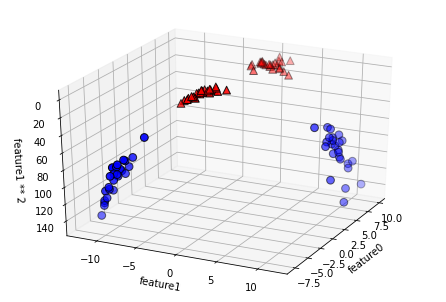

Help on class Axes3D in module mpl_toolkits.mplot3d.axes3d:

class Axes3D(matplotlib.axes._axes.Axes)
 |  3D axes object.
 |  
 |  Method resolution order:
 |      Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fig, rect=None, *args, azim=-60, elev=30, zscale=None, sharez=None, proj_type='persp', **kwargs)
 |      Parameters
 |      ----------
 |      fig : Figure
 |          The parent figure.
 |      rect : (float, float, float, float)
 |          The ``(left, bottom, width, height)`` axes position.
 |      azim : float, optional
 |          Azimuthal viewing angle, defaults to -60.
 |      elev : float, optional
 |          Elevation viewing angle, defaults to 30.
 |      zscale : {'function', 'functionlog', 'linear', 'log', 'logit', 'symlog'}, optional
 |          The z scale.  Note that currently, only a linear scale is
 |          supp

In [8]:
#3차원
X_new = np.hstack([X, X[:, 1:] ** 2])
print(X_new)

#3차원 공간 그래프 그리기
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

#Class 0, Class 1인 것 구분하여 순서대로 그림

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
plt.show()

help(Axes3D)

Text(0.5, 0, 'feature1 ** 2')

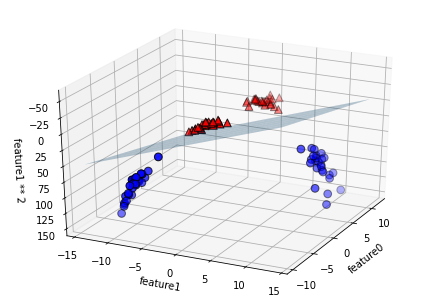

In [9]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기 (hyperplane 초평면)
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'feature 1')

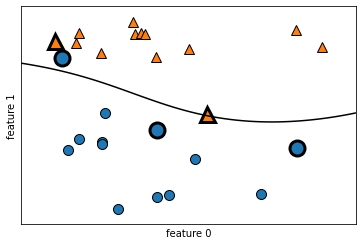

In [10]:
#선을 그어주므로써 클래스 구분이 쉬워진다.

from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

#데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#서포트 벡터
sv = svm.support_vectors_

#dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [11]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

import pandas as pd
X_Data = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

#X_Data()
X_Data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
#svm train나누어줄 필요없다.

import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#SVM, kernel = "linear" 로 선형분리 진행

svm_clf = svm.SVC(kernel = 'linear')

#교차검증
scores = cross_val_score(svm_clf, X_Data, y, cv=5)
scores

print("교차검증 평균: ", scores.mean())

print(pd.DataFrame(cross_validate(svm_clf, X_Data, y, cv=5)))

교차검증 평균:  0.9455364073901569
   fit_time  score_time  test_score
0  1.038927    0.001526    0.947368
1  2.493727    0.001490    0.929825
2  1.569410    0.001462    0.973684
3  0.804218    0.001400    0.921053
4  1.396785    0.001510    0.955752


In [13]:
# SVM, kernel = 'rbf'로 비선형분리 진행
svm_clf = svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X_Data, y, cv=5)
scores

print(pd.DataFrame(cross_validate(svm_clf, X_Data, y, cv=5)))

print('cross Mean: ', scores.mean())

   fit_time  score_time  test_score
0  0.006636    0.001859    0.850877
1  0.006829    0.001850    0.894737
2  0.007082    0.002071    0.929825
3  0.007071    0.001866    0.947368
4  0.007062    0.001996    0.938053
cross Mean:  0.9121720229777983


In [ ]:
from sklearn.model_selection import GridSearchCV
#테스트하고자 하는 파라미터 값(cost 값)들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear', random_state=42)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

#grid search로 c값을 찾아주는 방식
grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Data, y, test_size = 0.3, random_state = 42)

grid_svm.fit(X_Data, y)
print(grid_svm.best_params_) #좋은 파라미터를 보여줌
print(grid_svm.best_score_)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
model=grid_svm.best_estimator_ #최적의 파라미터로 모델 생성
y_pred = model.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
#rbf 비선형

from sklearn.model_selection import GridSearchCV
#테스트하고자 하는 파라미터 값(cost 값)들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'rbf', random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

#grid search로 최적의 파라미터 c값을 찾아주는 방식
grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Data, y, test_size = 0.3, random_state = 42)

grid_svm.fit(X_Data, y)
print(grid_svm.best_params_) #좋은 파라미터를 보여줌
print(grid_svm.best_score_)

model = grid_svm.best_estimator_ #최적의 파라미터로 모델 생성
y_pred=model.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
#전처리 후 x, y 값만 바꾸어서 사용할 수 있다.

from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

boston = load_boston()
x, y = boston.data, boston.target

x = scale(x)#StandardScaler
y = scale(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .3)
# Isvr=SVR(kernel = 'linear')
svr = SVR(kernel = 'rbf', gamma = 'auto')
svr.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

R-squared: 0.8799078240316929
CV mean score:  0.4911830321485834
MSE::  0.1711682373206233


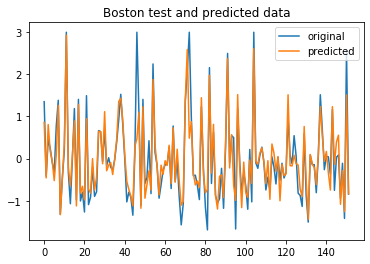

In [ ]:
score = svr.score(xtrain, ytrain)
print("R-squared:", score)

cv_score = cross_val_score(svr, x, y, cv=5)
print("CV mean score: ", cv_score.mean())

ypred = svr.predict(xtest)

#근사치가 거의 따라가기 때문에 svr은 mse을 많이 이용한다.
mse = mean_squared_error(ytest, ypred)
print("MSE:: ", mse)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = "original")
plt.plot(x_ax, ypred, label = "predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train) 
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))



훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.978


In [ ]:
from sklearn import tree
X = [[0, 0], [2, 3], [2, 1], [4, 7], [5, 4], [3, 2]]
Y = [0, 0, 0, 1, 1, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
clf.predict([[2, 2]])

array([0])

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=847da3d3de76576dc753bc6496d494d61372f439bba648c4e06b6692b6d2d798
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


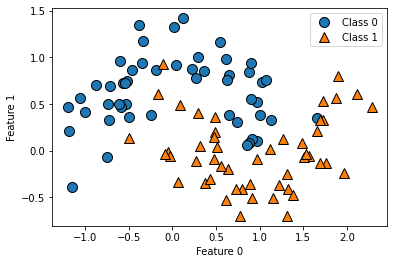

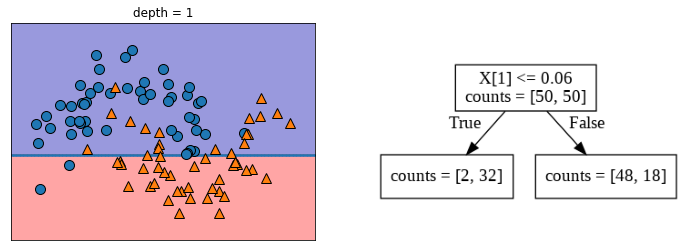

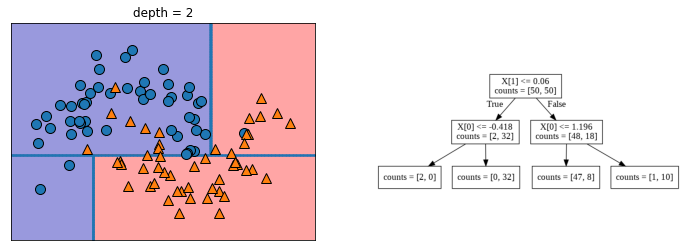

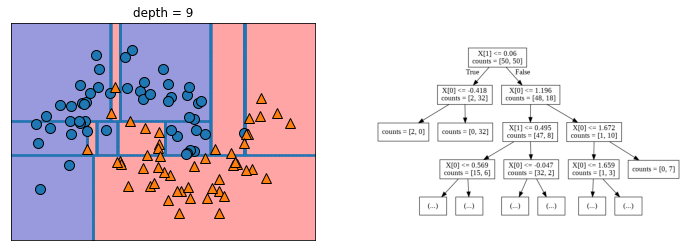

In [3]:
import mglearn

mglearn.plots.plot_tree_progressive()

In [ ]:
!pip install graphviz

In [ ]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44/bin/'

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import tree

iris = datasets.load_iris()
#print(iris)
X = iris.data[:, :4]
y = iris.target

#자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

#표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



In [ ]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

NameError: ignored

In [4]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(iris_tree,  out_file="iristree.dot", feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())
import graphviz
with open("iristree.dot",encoding='UTF-8') as f:
    dot_data = f.read()
display(graphviz.Source(dot_data))

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score

breast_cancer_data = load_breast_cancer()

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) #원래 데이터의 비율에 따라서 잘라진다. 혹은 비율을 유지한다.
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train set acc: {:.3f}".format(tree.score(X_train, y_train)))
print("test set acc: {:.3f}".format(tree.score(X_test, y_test)))

train set acc: 1.000
test set acc: 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

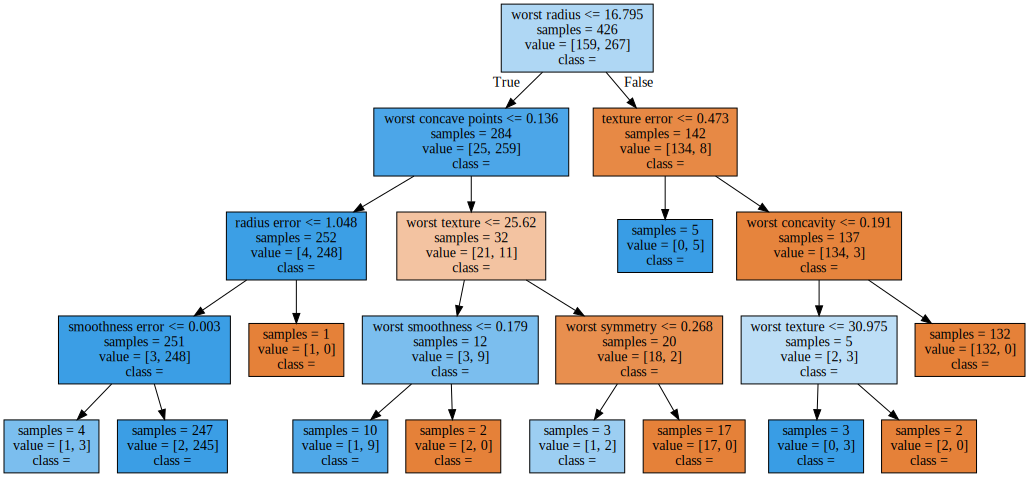

In [ ]:
import graphviz

with open("tree.dot", encoding='UTF-8') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("특성 중요도: \n", tree.feature_importances_)

특성 중요도: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_)
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

X, y = load_boston(return_X_y=True)
X.shape # (506, 13)

(506, 13)

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target
colnames = boston.feature_names #13개 컬럼 이름 가져올때
colnames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model = DecisionTreeRegressor(max_depth=3)
model.fit(X = X_train, y = y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X)
y_true = y

In [ ]:
#RandomForest와 비교하기 위해 한번 뽑아본것.
mse = mean_squared_error(y_true, y_pred)
print('mse =', mse)
rmse = (np.sqrt(mse))
print('rmse :', rmse)

mse = 0.017916666666666668
rmse : 0.13385315336840842


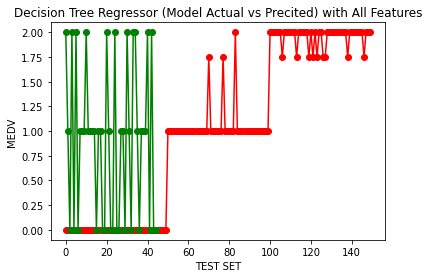

In [ ]:
#y_pred = regression.predict(X_test)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('TEST SET')
plt.ylabel('MEDV')
plt.plot(y_pred, 'o-', color='r', label='Predicted MEDV')
plt.plot(y_test, 'o-', color='g', label='Actual MEDV')